In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('/content/drive/MyDrive/kc_house_data.csv')
print(df.head().to_string())

           id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000  221900.0         3       1.00         1180      5650     1.0           0     0          3      7        1180              0      1955             0    98178  47.5112 -122.257           1340        5650
1  6414100192  20141209T000000  538000.0         3       2.25         2570      7242     2.0           0     0          3      7        2170            400      1951          1991    98125  47.7210 -122.319           1690        7639
2  5631500400  20150225T000000  180000.0         2       1.00          770     10000     1.0           0     0          3      6         770              0      1933             0    98028  47.7379 -122.233           2720        8062
3  2487200875  20141209T000000  604000.0         4       3.00   

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df['date'] = pd.to_datetime(df['date'])
df['years'] = 2025 - df['date'].dt.year
df.drop(['id','date','zipcode'],axis=1,inplace=True)
df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,years
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,11
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,11
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,10
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,11
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,10


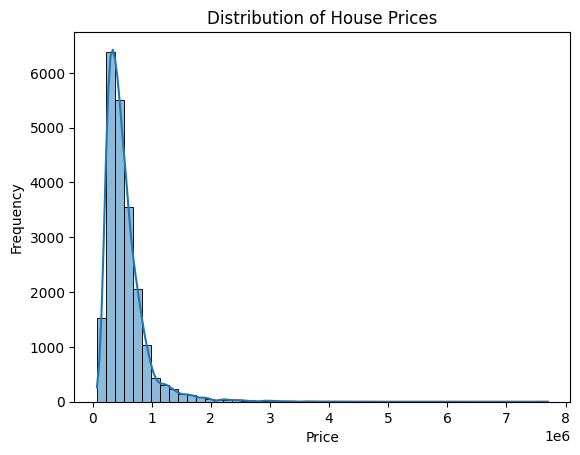

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


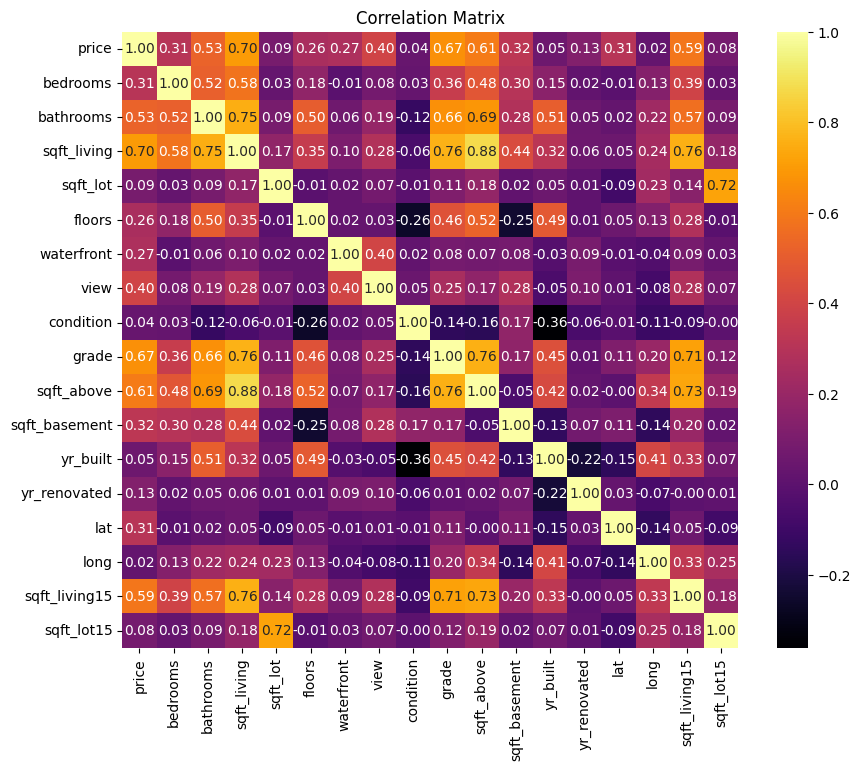

In [7]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='inferno', cbar=True, square=True)
plt.title('Correlation Matrix')
plt.show()

In [8]:
x=df.drop(["price"],axis=1)
y=df["price"]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [10]:
from xgboost import XGBRegressor

clf = XGBRegressor(n_estimators=400, max_depth=5, learning_rate=0.1, objective='reg:squarederror')


In [11]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [300, 400, 500],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.05, 0.1, 0.15],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}
grid_search = GridSearchCV(estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3,
                           n_jobs=-1,
                           verbose=2)


In [12]:
grid_search.fit(x_train, y_train)
print("Best hyperparameters found: ", grid_search.best_params_)
print("Best negative RMSE found: ", grid_search.best_score_)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best hyperparameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.9}
Best negative RMSE found:  -13653623553.047089


In [13]:
best_model = grid_search.best_estimator_
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [14]:
model = XGBRegressor(**{'colsample_bytree': 0.9, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.9}, objective='reg:squarederror', random_state=42)
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [15]:
model.score(x_test,y_test)

0.9001416547922196

In [17]:
y_pred = model.predict(x_test)

In [18]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

R-squared: 0.9001416547922196
RMSE: 123451.65301706652
MAE: 66635.72189476018


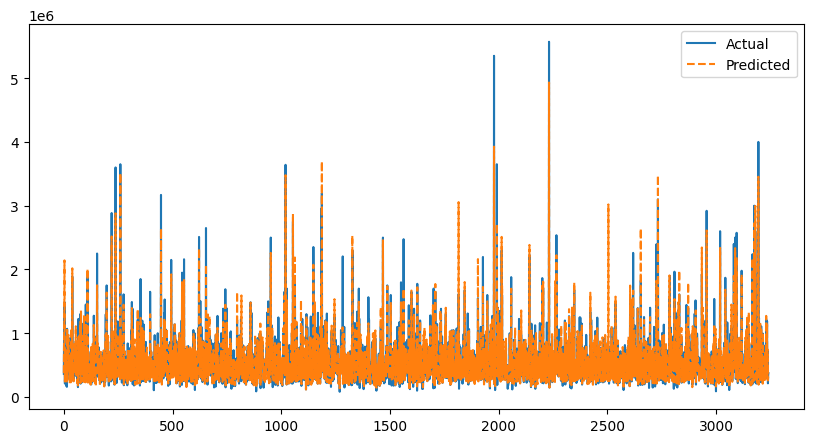

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual", linestyle="-")
plt.plot(y_pred, label="Predicted", linestyle="--")

plt.legend()
plt.show()


In [20]:
import joblib

joblib.dump(model, "/content/drive/MyDrive/house_price_model_XGBR.pkl")
print("Model saved successfully!")


Model saved successfully!


100%|===================| 18309/18371 [04:32<00:00]       

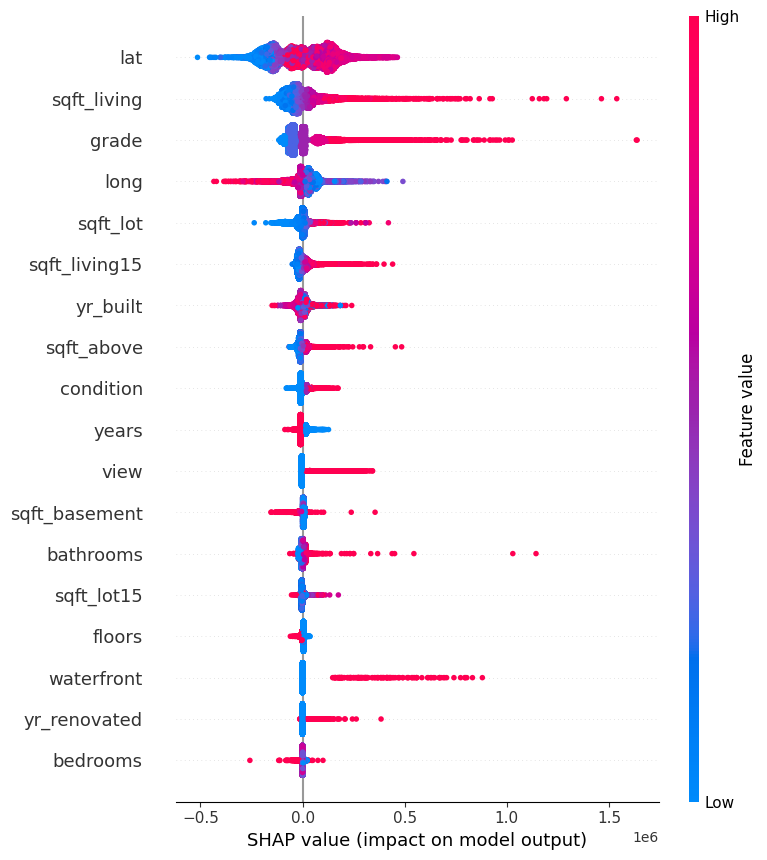

In [25]:
import shap

explainer = shap.Explainer(model, x_train)
shap_values = explainer(x_train)

shap.summary_plot(shap_values, x_train)
